# Análisis de Regresión Lineal para Predecir Precios de Viviendas

### Alumno: Carlos Ernesto Millán Hernández

## Dataset seleccionado

URL del dataset: https://www.kaggle.com/datasets/denkuznetz/housing-prices-regression

## Importando datos

In [126]:
import pandas as pd

df = pd.read_csv('real_estate_dataset.csv')
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [127]:
df.shape

(500, 12)

In [128]:
import matplotlib.pyplot as plt



In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
regressionSimple = LinearRegression()

### Separar las varibales descriptivas de la variable objetivo

In [131]:
X = df['Num_Bedrooms'].values
y = df['Price'].values

In [132]:
y.shape

(500,)

In [133]:
y=y.reshape(-1,1)
X=X.reshape(-1,1)

y.shape

(500, 1)

In [134]:
# Division de la base dedatos una de entrenamiento y otra de test
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=10)

In [135]:
X_prueba.shape
X_entrenamiento.shape

(350, 1)

In [136]:
from sklearn.linear_model import LinearRegression
regSimple = LinearRegression() #creamos el objeto de la clase

In [137]:
regSimple.fit(X_entrenamiento, y_entrenamiento) #ajustamos el modelo a los datos de entrenamiento

LinearRegression()

In [138]:
predicciones = regSimple.predict(X_prueba) #realizamos las predicciones con los datos de prueba

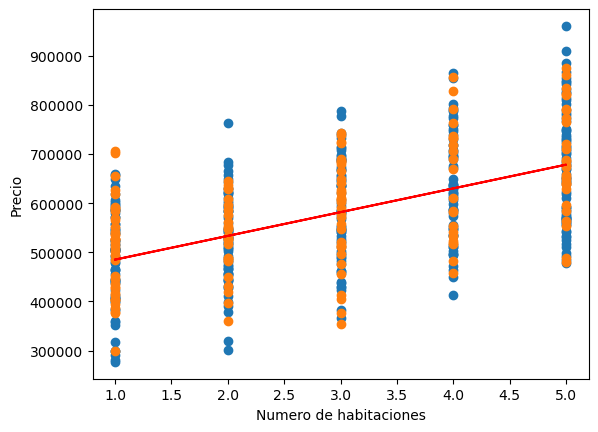

In [139]:
plt.scatter(X_entrenamiento, y_entrenamiento)
plt.scatter(X_prueba, y_prueba)
plt.plot(X_prueba, predicciones, color='red')
plt.ylabel('Precio')
plt.xlabel('Numero de habitaciones')
plt.show()

In [140]:
#metricas de rendimiento
#r-squared
regSimple.score(X_prueba, y_prueba)

0.3155863680116341

In [141]:
# Métricas de rendimiento
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_prueba, predicciones))
print("RMSE:", rmse)

RMSE: 99665.94784238703


Observaciones: Observamos que el valor de R² es muy bajo, lo que indica que el número de habitaciones no es un factor determinante para predecir si el precio de una vivienda será alto o bajo. Esto sugiere que existen otras variables más relevantes que influyen en el precio y que deberían incluirse en el modelo para mejorar su capacidad predictiva.

### Regresión lineal multiple

In [142]:
df.head()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523


In [143]:
y = df["Price"].values
X = df.drop(["Price"], axis=1)

In [144]:
y = y.reshape(-1, 1)
y.shape

(500, 1)

In [145]:
X.shape

(500, 11)

In [146]:
# Division de la base dedatos una de entrenamiento y otra de prueba
from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=10)

In [147]:
X_entrenamiento.shape

(350, 11)

In [148]:
from sklearn.linear_model import LinearRegression
regMultiple = LinearRegression() #creamos el objeto de la clase
regMultiple.fit(X_entrenamiento, y_entrenamiento) #ajustamos el modelo a los datos de entrenamiento


LinearRegression()

In [149]:
predicciones = regMultiple.predict(X_prueba) #realizamos las predicciones con los datos de prueba

In [150]:
regMultiple.score(X_prueba, y_prueba)

0.9771711986974041

In [151]:
 #Métricas de rendimiento
# RMSE
from sklearn.metrics import mean_squared_error
import numpy as np
rmse = np.sqrt(mean_squared_error(y_prueba, predicciones))
print("RMSE:", rmse)


RMSE: 18202.41575970493


Observaciones: El rango de predicciones mejora significativamente con la regresión lineal múltiple en comparación con la regresión lineal simple. Esto se debe a que la regresión lineal múltiple considera múltiples variables independientes, lo que permite capturar relaciones más complejas y relevantes entre las variables predictoras y la respuesta. Como resultado, el modelo puede explicar mejor la variabilidad de los datos y ofrecer predicciones más precisas.